In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("diamonds.csv", index_col =0)

In [3]:
df.shape

(53940, 10)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
cut_class_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

In [7]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
clarity_dict = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

In [10]:
df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


In [11]:
corrMatrix = df.corr()
corrMatrix

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


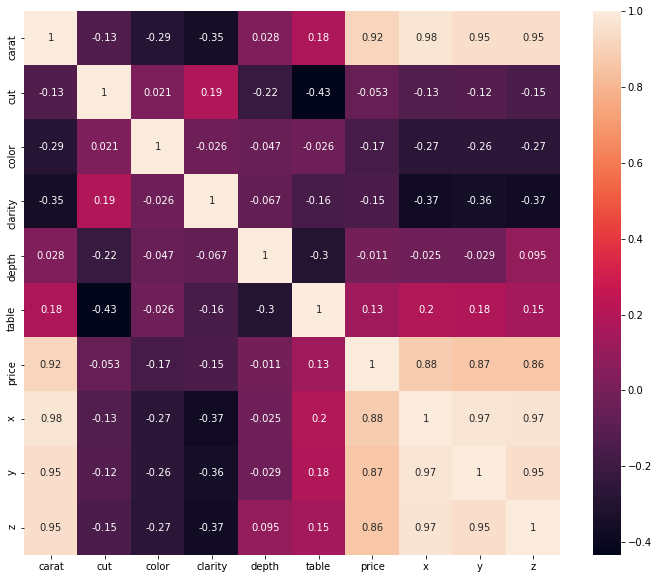

In [12]:
plt.figure(figsize = (12,10))
sns.heatmap(corrMatrix, annot=True)

In [13]:
import sklearn
from sklearn import svm, preprocessing

df = sklearn.utils.shuffle(df)

X=df.drop('price', axis = 1).values
X = preprocessing.scale(X)
y=df['price'].values

test_size = 200

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

clf_lin = svm.SVR(kernel = 'linear')
clf_lin.fit(X_train, y_train)  

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
clf_lin.score(X_test, y_test)

0.853327586688399

In [16]:
for X,y in zip(X_test, y_test):
    print(f"Model:{clf_lin.predict([X])}, Actual:{y}")

Model:[1593.96055083], Actual:1263
Model:[3371.71069509], Actual:3710
Model:[5928.91894955], Actual:7821
Model:[7482.34321872], Actual:4704
Model:[3704.49621015], Actual:3447
Model:[3475.48203945], Actual:3612
Model:[3348.66659632], Actual:3362
Model:[1487.36755257], Actual:1250
Model:[1111.05364949], Actual:911
Model:[248.87354844], Actual:645
Model:[5321.93850152], Actual:4854
Model:[8413.5138192], Actual:9494
Model:[1133.64493075], Actual:853
Model:[2842.61156562], Actual:3321
Model:[4773.15578348], Actual:5057
Model:[6399.94958014], Actual:10453
Model:[6419.97970326], Actual:10515
Model:[375.54586309], Actual:702
Model:[5663.57602222], Actual:8532
Model:[4392.6916494], Actual:4212
Model:[3347.14587816], Actual:3041
Model:[10445.55833684], Actual:18430
Model:[4697.33010724], Actual:3861
Model:[3972.87914755], Actual:4244
Model:[2190.13646118], Actual:2051
Model:[305.97941374], Actual:605
Model:[4438.50926469], Actual:4429
Model:[407.87579342], Actual:810
Model:[4244.59136096], Actua

In [17]:
new_data = [ 0.50053893,  0.05588908, -0.33855468, -4.24521508, -0.27409151,
        0.29046181,  0.99043234,  0.93657639,  0.33785273]

In [18]:
clf_lin.predict([new_data])

array([3357.25515385])

In [22]:
filename = 'diamondsmodel.sav'
pickle.dump(clf_lin, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict([new_data])
print(result)

[3357.25515385]
